# spatial transformer networks
mostly based on:
https://github.com/Lasagne/Recipes/blob/master/examples/spatial_transformer_network.ipynb

In [1]:
# most of the code is kept in helpers, to make it easier to grep for and change
# than in an ipython notebook
%matplotlib inline
import helpers
import matplotlib.pyplot as plt

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX 980 (CNMeM is enabled)


In [2]:
%%time
# load cluttered MNIST data (41MB)
in_train, in_valid, in_test = helpers.load_data()

Train samples: (50000, 1, 60, 60)
Validation samples: (10000, 1, 60, 60)
Test samples: (10000, 1, 60, 60)
CPU times: user 3.02 s, sys: 157 ms, total: 3.18 s
Wall time: 3.56 s


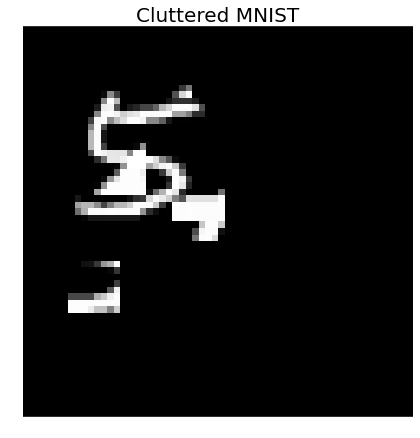

In [3]:
# example image
plt.figure(figsize=(7, 7))
plt.imshow(in_train["x"][101, 0], cmap='gray', interpolation='none')
plt.title('Cluttered MNIST', fontsize=20)
plt.axis('off')
plt.show()

In [12]:
%%time
# loading a network
network = helpers.load_network(update_scale_factor=0.5)
print network.root_node

HyperparameterNode(name=u'with_updates', learning_rate=0.002, cost_function=<function categorical_crossentropy_i32 at 0x7fbeb81675f0>)
| AdamNode(name=u'adam')
| | TotalCostNode(name=u'cost')
| | | ReferenceNode(name=u'pred_ref', reference=u'model')
| | | InputNode(name=u'y', dtype=u'int32', shape=(None,))
| | HyperparameterNode(name=u'model', bn_update_moving_stats=True, pool_size=(2, 2), filter_size=(3, 3), inits=[<treeano.inits.HeUniformInit object at 0x7fbdf7e21910>], num_units=256, dropout_probability=0.5, num_filters=32)
| | | SequentialNode(name=u'seq')
| | | | InputNode(name=u'x', shape=(None, 1, 60, 60))
| | | | UpdateScaleNode(name=u'st_update_scale', update_scale_factor=0.5)
| | | | | AffineSpatialTransformerNode(name=u'st', output_shape=(20, 20))
| | | | | | HyperparameterNode(name=u'loc', filter_size=(5, 5), num_filters=20, pool_size=(2, 2))
| | | | | | | SequentialNode(name=u'loc_seq')
| | | | | | | | MaxPool2DDNNNode(name=u'loc_pool1')
| | | | | | | | Conv2DDNNNode(name=

In [13]:
%%time
# train the network
helpers.train_network(network, in_train, in_valid, max_iters=50)

build took 0.5095s
network_compile took 3.3815s
compile_function took 3.3852s
build took 0.0000s
network_compile took 13.1547s
compile_function took 13.1588s
Starting training...
Beginning evaluate_until
generating_data took 0.0000s
data_transfer took 0.0842s
data_free took 0.0001s
data_transfer took 0.0288s
data_free took 0.0001s
  1: train_cost: 2.637 valid_cost: 1.471 valid_accuracy: 0.506
generating_data took 0.0000s
data_transfer took 0.0803s
data_free took 0.0001s
data_transfer took 0.0289s
data_free took 0.0001s
  2: train_cost: 1.525 valid_cost: 0.913 valid_accuracy: 0.707
generating_data took 0.0000s
data_transfer took 0.0776s
data_free took 0.0001s
data_transfer took 0.0306s
data_free took 0.0002s
  3: train_cost: 1.077 valid_cost: 0.648 valid_accuracy: 0.791
generating_data took 0.0000s
data_transfer took 0.0812s
data_free took 0.0001s
data_transfer took 0.0291s
data_free took 0.0001s
  4: train_cost: 0.833 valid_cost: 0.513 valid_accuracy: 0.840
generating_data took 0.0000s

In [14]:
%%time
# compile evaluation function
test_fn = helpers.test_fn(network)

build took 1.3061s
network_compile took 1.4400s
compile_function took 1.4417s
CPU times: user 2.62 s, sys: 136 ms, total: 2.76 s
Wall time: 2.75 s


data_transfer took 0.0235s
data_free took 0.0001s
data_transfer took 0.0199s
data_free took 0.0001s
data_transfer took 0.0188s
data_free took 0.0001s


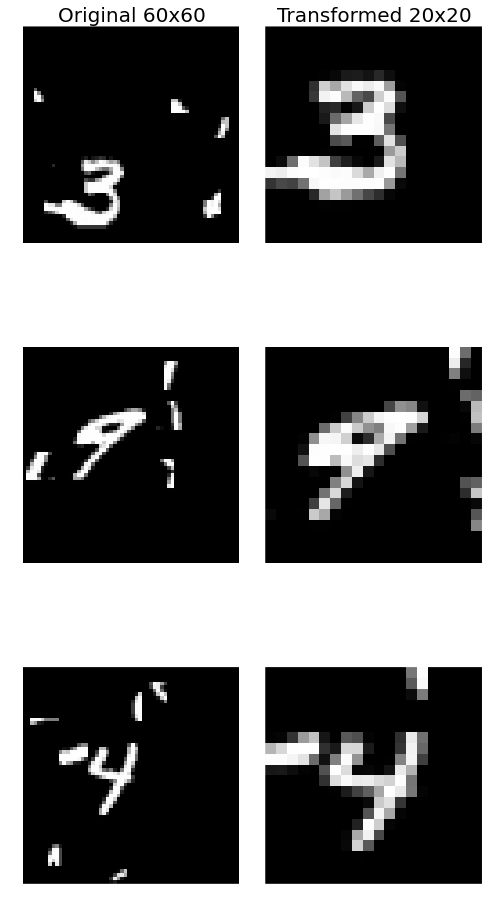

In [15]:
# results
plt.figure(figsize=(7, 14))
for i in range(3):
    plt.subplot(321+i*2)
    plt.imshow(in_test["x"][i, 0], cmap='gray', interpolation='none')
    if i == 0:
        plt.title('Original 60x60', fontsize=20)
    plt.axis('off')
    plt.subplot(322+i*2)
    plt.imshow(test_fn(in_test)["transformed"][i, 0],
               cmap='gray',
               interpolation='none')
    if i == 0:
        plt.title('Transformed 20x20', fontsize=20)
    plt.axis('off')
plt.tight_layout()